In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats

In [2]:

# This is the empirical 
def Fe(x, a):
    n = len(a)
    r = 0
    for i in range(n):
        if a[i] > x:
            return r/n
        else:
            r = r + 1 
    return 1.0

In [3]:
def D(a):
    X = np.linspace(0, 100, num=1000)
    T = 100.0
    result = 0
    for x in X:
        if result < abs(Fe(x, a) - x/T):
            result = abs(Fe(x, a) - x/T)
    return result


In [4]:
def plot_F(obs):
    X = np.linspace(0, 100, num=100)
    F = [Fe(x, obs) for x in X]
    plt.plot(X/100, F)
    plt.plot(X/100.0, X/100.0)
    plt.show()

In [5]:
# See text before example 11b - equation 11.5
def pvalue(iterations, dref, n):
    gt = 0
    for i in range(iterations):
        U = np.random.uniform(0, 1, size=n)
        Usorted = np.sort(U)
        D = np.max([np.max(np.arange(1, n+1)/n - Usorted), np.max(Usorted - np.arange(0, n)/n)])
        if D >= dref:
            gt += 1
    return gt/iterations

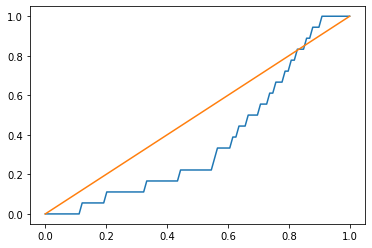

0.3273273273273274
0.03128


In [6]:
obs = [12, 20, 33, 44, 55, 56, 61, 63, 66, 70, 73, 75, 78, 80, 82, 85, 87, 90]
plot_F(obs)
print(D(obs))
print(pvalue(100000, 0.3277, 18))


In [7]:
# Check to see if the values are close
scipy.stats.kstest(obs, 'uniform', (0, 100))

KstestResult(statistic=0.32777777777777783, pvalue=0.031857487592344344)